# Challenge Data Mauna Kea
Analyze image duplicates

In [1]:
import numpy as np
import pandas as pd
import os
from skimage.measure import compare_ssim
import random
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [2]:
img_dir = "../data/raw/TrainingSetImagesDir"

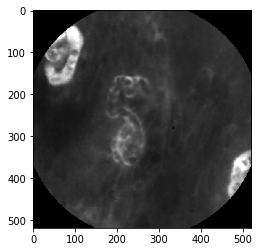

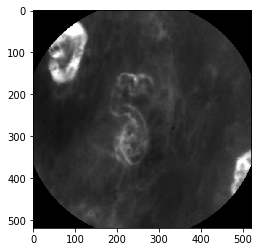

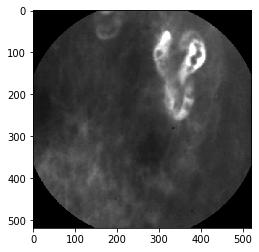

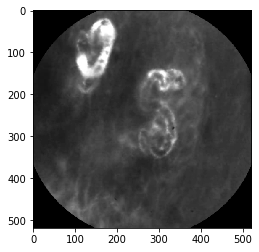

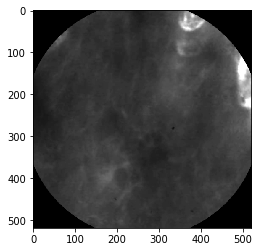

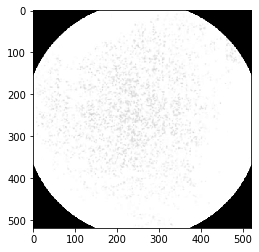

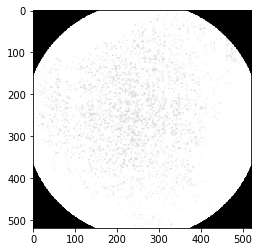

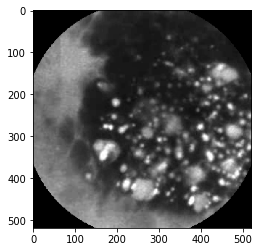

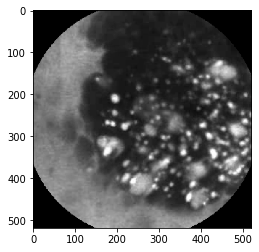

In [3]:
img = Image.open(os.path.join(img_dir, "im_49_5.png"))
img = np.array(img)[:,:,0]
plt.imshow(img, cmap="gray")
plt.figure()
img = Image.open(os.path.join(img_dir, "im_32_5.png"))
img = np.array(img)[:,:,0]
plt.imshow(img, cmap="gray")
plt.figure()
img = Image.open(os.path.join(img_dir, "im_0_5.png"))
img = np.array(img)[:,:,0]
plt.imshow(img, cmap="gray")
plt.figure()
img = Image.open(os.path.join(img_dir, "im_65_5.png"))
img = np.array(img)[:,:,0]
plt.imshow(img, cmap="gray")
plt.figure()
img = Image.open(os.path.join(img_dir, "im_9_5.png"))
img = np.array(img)[:,:,0]
plt.imshow(img, cmap="gray")
plt.figure()
img = Image.open(os.path.join(img_dir, "im_10_44.png"))
img = np.array(img)[:,:,0]
plt.imshow(img, cmap="gray")
plt.figure()
img = Image.open(os.path.join(img_dir, "im_11_44.png"))
img = np.array(img)[:,:,0]
plt.imshow(img, cmap="gray")
plt.figure()
img = Image.open(os.path.join(img_dir, "im_46_44.png"))
img = np.array(img)[:,:,0]
plt.imshow(img, cmap="gray")
plt.figure()
img = Image.open(os.path.join(img_dir, "im_57_44.png"))
img = np.array(img)[:,:,0]
plt.imshow(img, cmap="gray")

How to detect similar images?:
- blur and MSE
- ssim
- ahash
- phash
- dhash

In [4]:
im1 = np.array(Image.open(os.path.join(img_dir, "im_49_5.png")))[:,:,0]
im2 = np.array(Image.open(os.path.join(img_dir, "im_32_5.png")))[:,:,0]
im3 = np.array(Image.open(os.path.join(img_dir, "im_0_5.png")))[:,:,0]
im4 = np.array(Image.open(os.path.join(img_dir, "im_65_5.png")))[:,:,0]
im5 = np.array(Image.open(os.path.join(img_dir, "im_9_5.png")))[:,:,0]
im6 = np.array(Image.open(os.path.join(img_dir, "im_10_44.png")))[:,:,0]
im7 = np.array(Image.open(os.path.join(img_dir, "im_11_44.png")))[:,:,0]
im8 = np.array(Image.open(os.path.join(img_dir, "im_46_44.png")))[:,:,0]
im9 = np.array(Image.open(os.path.join(img_dir, "im_57_44.png")))[:,:,0]
print(compare_ssim(im1, im2))  # same
print(compare_ssim(im1, im3))
print(compare_ssim(im1, im4))
print(compare_ssim(im1, im5))
print(compare_ssim(im2, im3))
print(compare_ssim(im2, im4))
print(compare_ssim(im2, im5))
print(compare_ssim(im3, im4))
print(compare_ssim(im3, im5))
print(compare_ssim(im4, im5))
print(compare_ssim(im6, im7))  # same
print(compare_ssim(im6, im1))
print(compare_ssim(im8, im9))  # same
print(compare_ssim(im8, im1))

0.846005098611044
0.7297721274945054
0.7151810538015205
0.7805883735861577
0.7327911420232035
0.7201367665401104
0.7815608478481975
0.7540617266417206
0.8053809477266056
0.766056104889369
0.9887199138509051
0.34251695575124225
0.6381580363818016
0.5084289500111703


SSIM not really satisfying...

In [5]:
import imagehash
im1 = imagehash.dhash(Image.open(os.path.join(img_dir, "im_49_5.png")))
im2 = imagehash.dhash(Image.open(os.path.join(img_dir, "im_32_5.png")))
im3 = imagehash.dhash(Image.open(os.path.join(img_dir, "im_0_5.png")))
im4 = imagehash.dhash(Image.open(os.path.join(img_dir, "im_65_5.png")))
im5 = imagehash.dhash(Image.open(os.path.join(img_dir, "im_9_5.png")))
im6 = imagehash.dhash(Image.open(os.path.join(img_dir, "im_10_44.png")))
im7 = imagehash.dhash(Image.open(os.path.join(img_dir, "im_11_44.png")))
im8 = imagehash.dhash(Image.open(os.path.join(img_dir, "im_46_44.png")))
im9 = imagehash.dhash(Image.open(os.path.join(img_dir, "im_57_44.png")))
print(im1-im2)  # same
print(im1-im3)
print(im1-im4)
print(im1-im5)
print(im2-im3)
print(im2-im4)
print(im2-im5)
print(im3-im4)
print(im3-im5)
print(im4-im5)
print(im6-im7)  # same
print(im6-im1)
print(im8-im9)  # same
print(im8-im1)

3
31
28
20
30
27
19
15
17
20
1
32
6
23


dhash with a threshold of 5 seems ok!